# K Nearest Neighboorhood 
## Gökce Sucu 246112

## EXERCISE 0:
## DATASET PREPROCESSING

### 1. IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### 2. READING AND COMBINING THE ALL DATA SET

#### 2.1 Reading the Data Summary

In [2]:
data_summary = pd.read_csv('DataSummary.csv')
data_summary

,ID,Type,Name,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Data donor/editor
0,1,Image,Adiac,390,391,37,176,0.3887,0.3913 (3),0.3964,0.9591,A. Jalba
1,2,Image,ArrowHead,36,175,3,251,0.2000,0.2000 (0),0.2971,0.6057,L. Ye & E. Keogh
2,3,Spectro,Beef,30,30,5,470,0.3333,0.3333 (0),0.3667,0.8000,K. Kemsley & A. Bagnall
3,4,Image,BeetleFly,20,20,2,512,0.2500,0.3000 (7),0.3000,0.5000,J. Hills & A. Bagnall
4,5,Image,BirdChicken,20,20,2,512,0.4500,0.3000 (6),0.2500,0.5000,J. Hills & A. Bagnall
...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Spectrum,SemgHandMovementCh2,450,450,6,1500,0.6311,0.3622 (1),0.4156,0.8333,C.-C. M. Yeh
124,125,Spectrum,SemgHandSubjectCh2,450,450,5,1500,0.5956,0.2000 (3),0.2733,0.8000,C.-C. M. Yeh
125,126,Sensor,ShakeGestureWiimoteZ,50,50,10,Vary,0.4000,0.1600 (6),0.1400,0.9000,J. Guna
126,127,Simulated,SmoothSubspace,150,150,3,15,0.0933,0.0533 (1),0.1733,0.6667,X. Huang


So, we have 128 different data sets.

#### 2.2 List of Data Names

In [3]:
name_of_datas= list(data_summary['Name'])
name_of_datas

['Adiac',
 'ArrowHead',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'Car',
 'CBF',
 'ChlorineConcentration',
 'CinCECGTorso',
 'Coffee',
 'Computers',
 'CricketX',
 'CricketY',
 'CricketZ',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxTW',
 'Earthquakes',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'ElectricDevices',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FiftyWords',
 'Fish',
 'FordA',
 'FordB',
 'GunPoint',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'InlineSkate',
 'InsectWingbeatSound',
 'ItalyPowerDemand',
 'LargeKitchenAppliances',
 'Lightning2',
 'Lightning7',
 'Mallat',
 'Meat',
 'MedicalImages',
 'MiddlePhalanxOutlineAgeGroup',
 'MiddlePhalanxOutlineCorrect',
 'MiddlePhalanxTW',
 'MoteStrain',
 'NonInvasiveFetalECGThorax1',
 'NonInvasiveFetalECGThorax2',
 'OliveOil',
 'OSULeaf',
 'PhalangesOutlinesCorrect',
 'Phoneme',
 'Plane',
 'ProximalPhalanxOutlineAgeGroup',
 'ProximalPhalanxOutlineCorrect',
 'ProximalPhalanxTW',
 

#### 2.3 Creating 128 Datasets by Combining Train and Test Sets

In [4]:
combined_datas =[]

for i in range(0,128):
    file_name = name_of_datas[i]
    file_train_name = file_name + '_TRAIN.tsv'
    file_test_name = file_name + '_TEST.tsv'
    file_train = pd.read_csv(file_train_name,header=None,sep='\t')
    file_test = pd.read_csv(file_test_name,header=None,sep='\t')
    file = pd.concat([file_train,file_test],axis=0,ignore_index=True)
    combined_datas.append(file)   

#### 3. PADDLING

#### 3.1 Finding The Datasets that Have not Equal Length Samples

To find datas dont have same length samples, I am gonna use data summary file. In this data, there are some datas which have vary length. This is what we are looking for.

In [5]:
datas_havenot_same_length_sample=data_summary[data_summary['Length']=='Vary']
datas_havenot_same_length_sample

,ID,Type,Name,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Data donor/editor
86,87,Sensor,AllGestureWiimoteX,300,700,10,Vary,0.4843,0.2829 (14),0.2843,0.9000,J. Guna
87,88,Sensor,AllGestureWiimoteY,300,700,10,Vary,0.4314,0.2700 (9),0.2714,0.9000,J. Guna
88,89,Sensor,AllGestureWiimoteZ,300,700,10,Vary,0.5457,0.3486 (11),0.3571,0.9000,J. Guna
101,102,Trajectory,GestureMidAirD1,208,130,26,Vary,0.4231,0.3615 (5),0.4308,0.9615,H. A. Dau
102,103,Trajectory,GestureMidAirD2,208,130,26,Vary,0.5077,0.4000 (6),0.3923,0.9615,H. A. Dau
103,104,Trajectory,GestureMidAirD3,208,130,26,Vary,0.6538,0.6231 (1),0.6769,0.9615,H. A. Dau
104,105,Sensor,GesturePebbleZ1,132,172,6,Vary,0.2674,0.1744 (2),0.2093,0.8140,I. Maglogiannis
105,106,Sensor,GesturePebbleZ2,146,158,6,Vary,0.3291,0.2215 (6),0.3291,0.8101,I. Maglogiannis
115,116,Sensor,PickupGestureWiimoteZ,50,50,10,Vary,0.4400,0.3400 (17),0.3400,0.9000,J. Guna
119,120,Device,PLAID,537,537,11,Vary,0.4767,0.1657 (12),0.1639,0.8380,P. Schafer


In [6]:
datas_havenot_same_length_sample_list=datas_havenot_same_length_sample['ID'].values-1

In [7]:
print('Datasets Havenot Same Length Samples=\n',datas_havenot_same_length_sample_list)

Datasets Havenot Same Length Samples=
 [ 86  87  88 101 102 103 104 105 115 119 125]


In conclusion, there are 9 datasets that have different sample length.

#### 3.2 Padding Function

THe main idea of padding, finding tha nan values in a row, then adding this amount zero point to the left and deleting the right part of row.

In [8]:
def padding(dataset):
    matrix = dataset.values
    first_column =matrix[:,0]
    matrix_witohut_first_column = matrix[:,1:]

    number_of_samples = int(matrix.shape[0])
    length_of_a_sample =int(matrix.shape[1])

    for k in range(0,number_of_samples):
        number_of_nan_values = np.isnan(matrix[k]).sum()
        if number_of_nan_values!=0:
            zeros = [0]*number_of_nan_values
            class_type= [first_column[k]]
            rest= matrix_witohut_first_column[k][:-number_of_nan_values].tolist()
            matrix[k]=np.array(class_type + zeros + rest)
    
    return pd.DataFrame(matrix)
    

#### 3.3 Padding the Dataset 

Now, we will apply padding to the whole dataests.

In [9]:
for i in datas_havenot_same_length_sample_list:
    combined_datas[i]=padding(combined_datas[i])

In [10]:
#example 
combined_datas[86]

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,0.192,0.154,0.154,0.154,0.192,0.192,0.192,0.192,0.192
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.846,-0.846,-0.769,-0.769,-0.731,-0.731,-0.692,-0.692,-0.692,-0.615
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.154,0.154,0.154,0.154,0.154,0.115,0.077,0.077,0.115,0.115
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,0.192,0.154,0.154,0.154,0.154,0.154,0.154,0.154,0.115
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.231,0.231,0.269,0.269,0.231,0.192,0.192,0.192,0.154,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038,0.077,0.077,0.077,0.077,0.115,0.115,0.115,0.077,0.077
996,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.115,-0.115,-0.115,-0.115,-0.115,-0.115,-0.077,-0.077,-0.077,-0.077
997,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.154,-0.154,-0.154,-0.115,0.038,0.077,0.115,0.346,0.346,0.538
998,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,0.192,0.192,0.154,0.192,0.154,0.154,0.154,0.154,0.115


### 4. SPLITTING INTO TEST, TRAIN, VALIDATION SETS

#### 4.1 Defining the Functions

In [54]:
def train_val_test(dataset):
    sample_length = int(dataset.shape[1])
    set_of_classes = set(dataset[0])

    maximum_sample = dataset.shape[0]
    minimum_sample = maximum_sample
    
    removed_set_of_classes=set(dataset[0])
    
    for i in set_of_classes:
        n =dataset[dataset[0]==i].shape[0]
        if n>3 and n<minimum_sample:
            minimum_sample=n
        elif n<3:
            removed_set_of_classes.remove(i)
            
    indexing = list(range(0,sample_length))
    
    train_set=pd.DataFrame(columns= indexing)
    valid_set=pd.DataFrame(columns = indexing)
    test_set=pd.DataFrame(columns = indexing)
    
    
    number_of_train_samples = math.floor(minimum_sample*0.7)
    number_of_valid_samples=math.floor((minimum_sample-number_of_train_samples)/2)
    
    for j in removed_set_of_classes:
        table_a_class = dataset[dataset[0]==j]
        train_set=pd.concat([train_set,table_a_class.iloc[:number_of_train_samples,:]], axis=0)
        valid_set=pd.concat([valid_set,table_a_class.iloc[number_of_train_samples:number_of_train_samples+number_of_valid_samples,:]], axis=0)
        test_set=pd.concat([test_set,table_a_class.iloc[number_of_train_samples+number_of_valid_samples:minimum_sample,:]], axis=0)
    
    return train_set, valid_set, test_set

    

#### 4.2 Creating Train, Validation and Test Sets with Stratified Samples

In [55]:
train_set = []
valid_set = []
test_set = []
for i in range(0,128):
    data = combined_datas[i]
    train, valid,test= train_val_test(data)
    train_set.append(train)
    valid_set.append(valid)
    test_set.append(test)
    

In [56]:
print(len(train_set))
print(len(valid_set))
print(len(test_set))

128
128
128


### 5. STANDARIZE THE DATASETS

#### 5.1 Standarize Function

In [14]:
def standardize_dataset(dataset):
    matrix =dataset.values
    
    standard_deviation=np.std(matrix[:,1:])
    mean = np.mean(matrix)
    
    rows =matrix.shape[0]
    columns=matrix.shape[1]
    
    for i in range(0,rows):
        for j in range(1,columns):
            matrix[i][j]=(matrix[i][j]-mean)/standard_deviation
            
    return matrix

#### 5.2 Standardize The Train Sets

In [15]:
standard_train_set = []
for i in range(0,128):
    standard_train_set.append(standardize_dataset(train_set[i]))


#### 5.3 Standardize The Valid Sets

In [16]:
standard_valid_set = []
for i in range(0,128):
    standard_valid_set.append(standardize_dataset(valid_set[i]))

#### 5.4 Standardize The Test Sets

In [17]:
standard_test_set = []
for i in range(0,128):
    standard_test_set.append(standardize_dataset(test_set[i]))

### 6. PLOTTING INTERESTING STATS

#### 5.1 Total Length of Samples

In [18]:
length_of_samples = []
for i in range(0,128):
    length_of_samples.append((combined_datas[i].shape[1]))

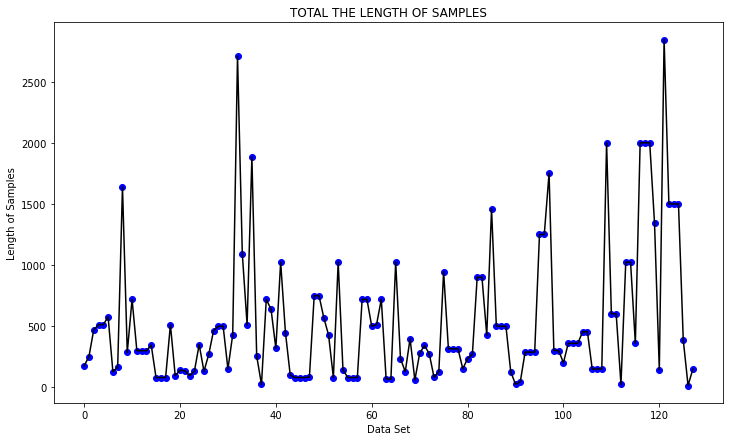

In [19]:
plt.figure(figsize=(12,7))
plt.title('TOTAL THE LENGTH OF SAMPLES')
plt.plot(length_of_samples,'bo',length_of_samples,'k')
plt.xlabel('Data Set')
plt.ylabel('Length of Samples')
plt.show()

#### 5.2 Number of Classess

In [20]:
number_of_classes =[]
for i in range(0,128):
    a =combined_datas[i]
    b =len(set(a[0]))
    number_of_classes.append(b)

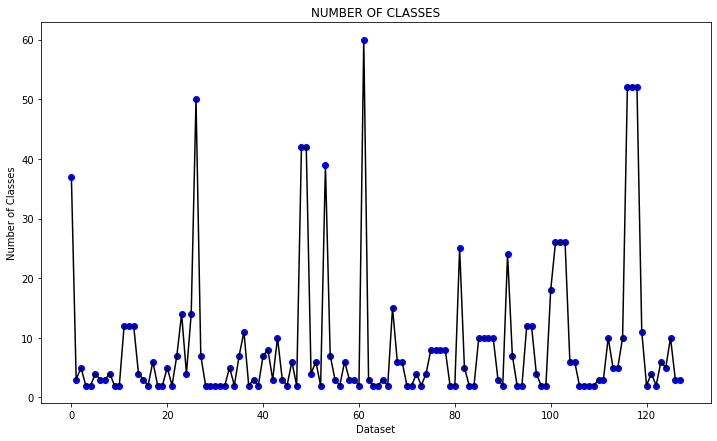

In [21]:
plt.figure(figsize=(12,7))
plt.title('NUMBER OF CLASSES')
plt.plot(list(range(0,128)),number_of_classes,'bo',list(range(0,128)),number_of_classes,'k')
plt.xlabel('Dataset')
plt.ylabel('Number of Classes')
plt.show()

#### 5.3 Total Length of Samples

In [22]:
number_of_samples=[]
for j in range(0,128):
    number_of_samples.append((combined_datas[j].shape[0]))

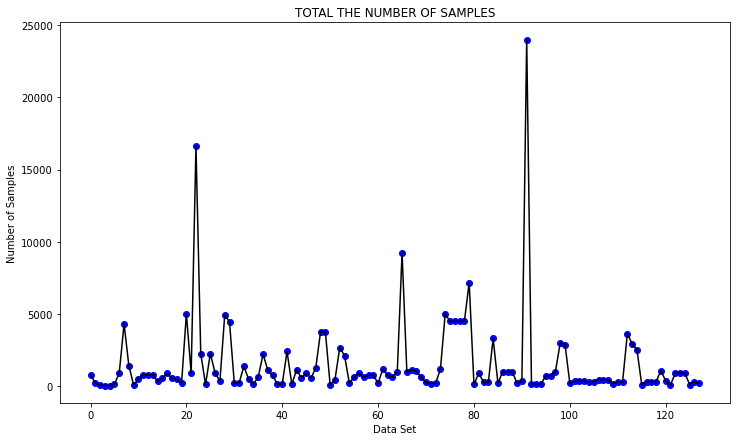

In [23]:
plt.figure(figsize=(12,7))
plt.title('TOTAL THE NUMBER OF SAMPLES')
plt.plot(number_of_samples,'bo',number_of_samples,'k')
plt.xlabel('Data Set')
plt.ylabel('Number of Samples')
plt.show()

# EXERCISE 2:
# DATASET IMPUTATION WITH KNN

## 2.1. DATASETS HAVING MISSING VALUES

Now ,because we already did padding , so we will just look for NaN values in datasets to find missing values.

In [24]:
data_set_with_nan_values = []
for i in range(0,128):
    if combined_datas[i].isnull().sum().sum()!=0:
        print(f'{i}th datasets have {combined_datas[i].isnull().sum().sum()} NaN Values')
        data_set_with_nan_values.append(i)

92th datasets have 337 NaN Values
93th datasets have 337 NaN Values
94th datasets have 337 NaN Values
112th datasets have 253 NaN Values


In [25]:
print('List of Datasets Having missing Values:\n',data_set_with_nan_values )

List of Datasets Having missing Values:
 [92, 93, 94, 112]


In [26]:
len(data_set_with_nan_values )

4

So there are 4 datasets having missing values. So, we will use imputation for those 4 datasets.

## 2.2. IMPUTATION

### 2.2.1 Defining The Functions

#### 2.2.1.1 Euclid metric

In [27]:
def euclid(x_one,x_two):  
    dimension = int(x_one.shape[0])
    distance = 0
    
    for i in range(1,dimension):
        distance = distance + (x_one[i]-x_two[i])**2
    
    return  np.sqrt(distance)      

#### 2.2.1.2 K-Neighborhood

In [28]:
def k_neihborhood(rowth_index, dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns = int(matrix.shape[1])
    D=[]
    for i in range(0,rows):
        if i!=rowth_index:
            D.append((euclid(matrix[rowth_index],matrix[i]),i))
    D =sorted(D,key=lambda tup:tup[0])
    return  D[:k] 

#### 2.2.2 Nearest Regression Algorithm

In [29]:
def predict_knn_reg(rowth_index,dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns=int(matrix.shape[1])
    
    D = k_neihborhood(rowth_index, dataset,k)
    for i in range(0,columns):
        prediction =0
        for (a,b) in D:
            prediction = prediction + matrix[b][i]
        matrix[rowth_index][i]=prediction/4
    
    return matrix[rowth_index]      
            

### 2.2.2 Imputation for 92th Dataset

#### 2.2.2.1 Finding the Places of Missing Values

In [30]:
nan_values_rows = []
matris = combined_datas[92].isnull()
matris = matris.values
rows = matris.shape[0]
columns=matris.shape[1]

for i in range(0,rows):
    for j in range(0,columns):
        if matris[i][j]==True:
            nan_values_rows.append((i,j))
    

#### 2.2.2.2 Imputation

In [32]:
for (a,b) in nan_values_rows:
    combined_datas[92].iloc[a,b]=predict_knn_reg(a,combined_datas[92],5)[b]

#### 2.2.2.3 Checking The NaN Values after Imputation

In [33]:
combined_datas[92].isnull().sum().sum()

0

### 2.2.3 Imputation for 93th Dataset

#### 2.2.3.1 Finding the Places of Missing Values

In [34]:
nan_values_rows = []
matris = combined_datas[93].isnull()
matris = matris.values
rows = matris.shape[0]
columns=matris.shape[1]

for i in range(0,rows):
    for j in range(0,columns):
        if matris[i][j]==True:
            nan_values_rows.append((i,j))
    

####  2.2.3.2 Imputation

In [36]:
seven= predict_knn_reg(7,combined_datas[93],5)
fifteen=predict_knn_reg(15,combined_datas[93],5)
nineteen=predict_knn_reg(19,combined_datas[93],5)
twentyseven=predict_knn_reg(27,combined_datas[93],5)
thirtythree=predict_knn_reg(33,combined_datas[93],5)
fourtyone=predict_knn_reg(41,combined_datas[93],5)
fourtytwo=predict_knn_reg(42,combined_datas[93],5)
fiftytwo=predict_knn_reg(52,combined_datas[93],5)
fiftyseven=predict_knn_reg(57,combined_datas[93],5)
seventyseven=predict_knn_reg(77,combined_datas[93],5)
ninetyfive=predict_knn_reg(95,combined_datas[93],5)
onehundredseven=predict_knn_reg(107,combined_datas[93],5)
onehundredten=predict_knn_reg(110,combined_datas[93],5)
onehundredtwentyfour=predict_knn_reg(124,combined_datas[93],5)

In [37]:
for a,b in nan_values_rows:
    if a ==7:
        combined_datas[93].iloc[a,b]=seven[b]
    if a ==15:
        combined_datas[93].iloc[a,b]=fifteen[b]
    if a ==19:
        combined_datas[93].iloc[a,b]=nineteen[b]
    if a ==27:
        combined_datas[93].iloc[a,b]=twentyseven[b]
    if a ==33:
        combined_datas[93].iloc[a,b]=thirtythree[b]
    if a ==41:
        combined_datas[93].iloc[a,b]=fourtyone[b]
    if a ==42:
        combined_datas[93].iloc[a,b]=fourtytwo[b]
    if a ==52:
        combined_datas[93].iloc[a,b]=fiftytwo[b]
    if a ==57:
        combined_datas[93].iloc[a,b]=fiftyseven[b]
    if a ==77:
        combined_datas[93].iloc[a,b]=seventyseven[b]
    if a ==95:
        combined_datas[93].iloc[a,b]=ninetyfive[b]
    if a==107:
        combined_datas[93].iloc[a,b]=onehundredseven[b]
    if a==110:
        combined_datas[93].iloc[a,b]=onehundredten[b]
    if a==124:
        combined_datas[93].iloc[a,b]=onehundredtwentyfour[b]    

#### 2.2.3.3 Checking The NaN Values after Imputation

In [38]:
combined_datas[93].isnull().sum().sum()

0

### 2.2.4 Imputation for 94th Dataset

#### 2.2.4.1 Finding the Places of Missing Values

In [110]:
nan_values_rows_second = []
matris = combined_datas[94].isnull()
matris = matris.values
rows = matris.shape[0]
columns=matris.shape[1]

for i in range(0,rows):
    for j in range(0,columns):
        if matris[i][j]==True:
            nan_values_rows_second.append((i,j))
    

#### 2.2.4.2 Imputation

In [41]:
seventh = predict_knn_reg(7,combined_datas[94],5)
ninth = predict_knn_reg(9,combined_datas[94],5)
twentyfifth = predict_knn_reg(25,combined_datas[94],5)
twentyeigthth=predict_knn_reg(28,combined_datas[94],5)
fourtytwoth=predict_knn_reg(42,combined_datas[94],5)
fourtyseventh=predict_knn_reg(47,combined_datas[94],5)
fiftythreeth= predict_knn_reg(53,combined_datas[94],5)
fiftyfourth=predict_knn_reg(54,combined_datas[94],5)
sixtyninth=predict_knn_reg(69,combined_datas[94],5)
seventyninth =predict_knn_reg(79,combined_datas[94],5)
onehundredthirth=predict_knn_reg(103,combined_datas[94],5)
onehundredtwentyseven=predict_knn_reg(127,combined_datas[94],5)
onehundredthirtysix = predict_knn_reg(136,combined_datas[94],5)

In [42]:
for a,b in nan_values_rows:
    if a ==7:
        combined_datas[94].iloc[a,b]=seventh[b]
    if a ==9:
        combined_datas[94].iloc[a,b]=ninth[b]
    if a ==25:
        combined_datas[94].iloc[a,b]=twentyfifth[b]
    if a ==28:
        combined_datas[94].iloc[a,b]=twentyeigthth[b]
    if a ==42:
        combined_datas[94].iloc[a,b]=fourtytwoth[b]
    if a ==47:
        combined_datas[94].iloc[a,b]=fourtyseventh[b]
    if a ==53:
        combined_datas[94].iloc[a,b]=fiftythreeth[b]
    if a ==54:
        combined_datas[94].iloc[a,b]=fiftyfourth[b]
    if a ==69:
        combined_datas[94].iloc[a,b]=sixtyninth[b]
    if a ==79:
        combined_datas[94].iloc[a,b]=seventyninth[b]
    if a ==103:
        combined_datas[94].iloc[a,b]=onehundredthirth[b]
    if a ==127:
        combined_datas[94].iloc[a,b]=onehundredtwentyseven[b]
    if a ==136:
        combined_datas[94].iloc[a,b]=onehundredthirtysix[b]    


In [103]:

combined_datas[94].iloc[32,163]=predict_knn_reg(32,combined_datas[94],5)

#### 2.2.4.3 Checking The NaN Values after Imputation

In [104]:
combined_datas[94].isnull().sum().sum()

0

### 2.2.5 Imputation for 112th Dataset

#### 2.2.5.1 Finding the Places of Missing Values

In [44]:
nan_values_rows = []
matris = combined_datas[112].isnull()
matris = matris.values
rows = matris.shape[0]
columns=matris.shape[1]

for i in range(0,rows):
    for j in range(0,columns):
        if matris[i][j]==True:
            nan_values_rows.append((i,j))
    

#### 2.2.5.2 Imputation

In [46]:
for (a,b) in nan_values_rows:
    combined_datas[112].iloc[a,b]=predict_knn_reg(a,combined_datas[112],5)[b]

#### 2.2.5.3 Checking The NaN Values after Imputation

In [47]:
combined_datas[112].isnull().sum().sum()

0

### 2.2.6 After Imputation Whole Dataset

In [48]:
all_nan_values =0
for i in range(0,128):
    all_nan_values=all_nan_values+combined_datas[i].isnull().sum().sum()

In [81]:
all_nan_values

1

After imputation, there is no any NaN values.

## 2.3 K-NEAREST NEIGHBOUR CLASSIFIER

### 2.3.1 Defining The Functions

#### 2.3.1 Euclid Metric 

In [154]:
def euclid(x_one,x_two):  
    dimension = int(x_one.shape[0])
    distance = 0
    
    for i in range(1,dimension):
        distance = distance + (x_one[i]-x_two[i])**2
    
    return  np.sqrt(distance)   

#### 2.3.2 K-Neighboorhood

In [155]:
def k_neihborhood(rowth_index, dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns = int(matrix.shape[1])
    D=[]
    for i in range(0,rows):
        if i!=rowth_index:
            D.append((euclid(matrix[rowth_index],matrix[i]),i))
    D =sorted(D,key=lambda tup:tup[0])
    return  D[:k] 

#### 2.3.3 Nearest Neighbor Classification Algorithm

In [156]:
def predict_knn_reg(rowth_index,dataset,k):
    matrix = dataset.values
    k_near_neighboorhood = k_neihborhood(rowth_index, dataset,k)
    prediction=0
    for (a,b) in  k_near_neighboorhood:
        if matrix[b][0]==matrix[rowth_index][0]:
            prediction=prediction+1
        else:
            prediction=prediction+0
    return prediction/k   

In [157]:
def accuracy_of_dataset(dataset,k):
    accuracy=0
    row = dataset.shape[0]
    for i in range(0,row):
        accuracy =accuracy + predict_knn_reg(i,dataset,k)
    return accuracy  

### 2.3.2 Maximizing The Accuracy

Now, we will maximize the accuracy by changing k=1,3,5 on validation set. Becuase my computer is very slow, i will take just first 60 dataset.

#### For k=1

In [78]:
k=1
total_accuarcy_one =[]
for i in range(0,60):
    total_accuarcy_one.append(accuracy_of_dataset(valid_set[i],k))
    print(f'{i}th')

0th
1th
2th
3th
4th
5th
6th
7th
8th
9th
10th
11th
12th
13th
14th
15th
16th
17th
18th
19th
20th
21th
22th
23th
24th
25th
26th
27th
28th
29th
30th
31th
32th
33th
34th
35th
36th
37th
38th
39th
40th
41th
42th
43th
44th
45th
46th
47th
48th
49th
50th
51th
52th
53th
54th
55th
56th
57th
58th
59th


#### For k=3

In [79]:
total_accuarcy_two =[]
for i in range(0,60):
    total_accuarcy_two.append(accuracy_of_dataset(valid_set[i],3))
    print(f'{i}th')

0th
1th
2th
3th
4th
5th
6th
7th
8th
9th
10th
11th
12th
13th
14th
15th
16th
17th
18th
19th
20th
21th
22th
23th
24th
25th
26th
27th
28th
29th
30th
31th
32th
33th
34th
35th
36th
37th
38th
39th
40th
41th
42th
43th
44th
45th
46th
47th
48th
49th
50th
51th
52th
53th
54th
55th
56th
57th
58th
59th


#### For k=5

In [80]:
total_accuarcy_three =[]
for i in range(0,60):
    total_accuarcy_three.append(accuracy_of_dataset(valid_set[i],5))
    print(f'{i}th')

0th
1th
2th
3th
4th
5th
6th
7th
8th
9th
10th
11th
12th
13th
14th
15th
16th
17th
18th
19th
20th
21th
22th
23th
24th
25th
26th
27th
28th
29th
30th
31th
32th
33th
34th
35th
36th
37th
38th
39th
40th
41th
42th
43th
44th
45th
46th
47th
48th
49th
50th
51th
52th
53th
54th
55th
56th
57th
58th
59th


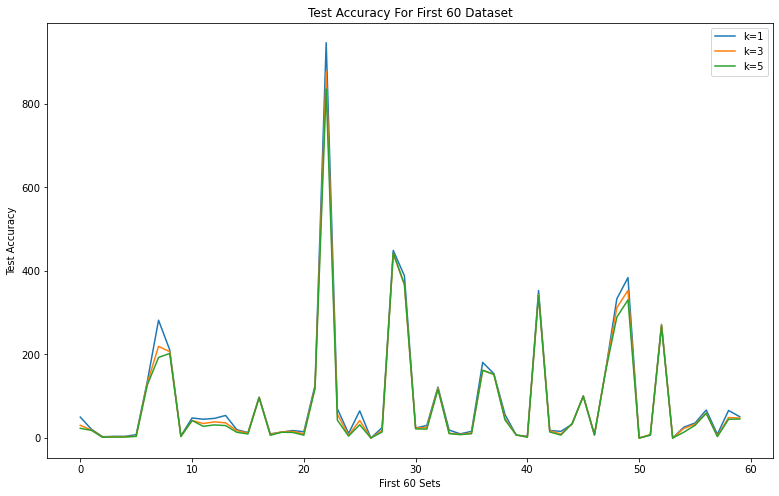

In [123]:
plt.figure(figsize=(13,8))
plt.title('Test Accuracy For First 60 Dataset')
plt.plot(total_accuarcy_one, label ='k=1')
plt.plot(total_accuarcy_two,label ='k=3')
plt.plot(total_accuarcy_three, label ='k=5')
plt.xlabel('First 60 Sets')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

In [97]:
total_accuracy_all = [sum(total_accuarcy_one),sum(total_accuarcy_two),sum(total_accuarcy_three)]

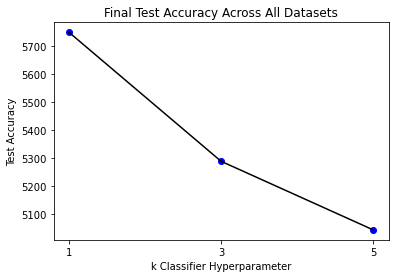

In [124]:
plt.title('Final Test Accuracy Across All Datasets')
plt.plot(('1','3','5') ,total_accuracy_all,'bo',('1','3','5') ,total_accuracy_all,'k')
plt.xlabel('k Classifier Hyperparameter')
plt.ylabel('Test Accuracy')
plt.show()

# EXERCISE 2
# TIME SERIES CLASSIFICATION with VARIOUS DISTANCE MEASURES

 Now, we will find a single most optimal distance measure across all time series. Because of my computer is very slow, I would take just first 20 datasets.

## EX 2.1 TUNING  K and SELECTING MEASURE THE METRIC

In [126]:
from scipy.spatial.distance import pdist, squareform

### 2.1.1 Minkowski 

In [132]:
Y = pdist(X, 'minkowski', p=2.)

In [135]:
def k_neihborhood_minkowski(rowth_index, dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns = int(matrix.shape[1])
    D=[]
    for i in range(0,rows):
        if i!=rowth_index:
            X = np.array([matrix[rowth_index],matrix[i] ])
            D.append((pdist(X, 'minkowski', p=2.),i))
    D =sorted(D,key=lambda tup:tup[0])
    return  D[:k] 

In [136]:
def predict_knn_reg_minkowski(rowth_index,dataset,k):
    matrix = dataset.values
    k_near_neighboorhood = k_neihborhood_minkowski(rowth_index, dataset,k)
    prediction=0
    for (a,b) in  k_near_neighboorhood:
        if matrix[b][0]==matrix[rowth_index][0]:
            prediction=prediction+1
        else:
            prediction=prediction+0
    return prediction/k 

In [138]:
def accuracy_of_dataset_minkowski(dataset,k):
    accuracy=0
    row = dataset.shape[0]
    for i in range(0,row):
        accuracy =accuracy + predict_knn_reg_minkowski(i,dataset,k)
    return accuracy  

In [161]:
accuracy_over_twenty_datas_minkowski =[]
for i in range(0,20):
    accuracy_over_twenty_datas_minkowski.append(accuracy_of_dataset_minkowski(valid_set[i],1))
    print(f'{i}th okay')

0th okay
1th okay
2th okay
3th okay
4th okay
5th okay
6th okay
7th okay
8th okay
9th okay
10th okay
11th okay
12th okay
13th okay
14th okay
15th okay
16th okay
17th okay
18th okay
19th okay


### 2.1.2 Cityblock

In [162]:
#Y = pdist(X, 'cityblock')

def k_neihborhood_cityblock(rowth_index, dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns = int(matrix.shape[1])
    D=[]
    for i in range(0,rows):
        if i!=rowth_index:
            X = np.array([matrix[rowth_index],matrix[i] ])
            D.append((pdist(X, 'cityblock' ),i))
    D =sorted(D,key=lambda tup:tup[0])
    return  D[:k] 



def predict_knn_reg_cityblock(rowth_index,dataset,k):
    matrix = dataset.values
    k_near_neighboorhood = k_neihborhood_cityblock(rowth_index, dataset,k)
    prediction=0
    for (a,b) in  k_near_neighboorhood:
        if matrix[b][0]==matrix[rowth_index][0]:
            prediction=prediction+1
        else:
            prediction=prediction+0
    return prediction/k 

def accuracy_of_dataset_cityblock(dataset,k):
    accuracy=0
    row = dataset.shape[0]
    for i in range(0,row):
        accuracy =accuracy + predict_knn_reg_cityblock(i,dataset,k)
    return accuracy  



In [163]:
accuracy_over_twenty_datas_cityblock =[]
for i in range(0,20):
    accuracy_over_twenty_datas_cityblock.append(accuracy_of_dataset_cityblock(valid_set[i],1))
    print(f'{i}th okay')

0th okay
1th okay
2th okay
3th okay
4th okay
5th okay
6th okay
7th okay
8th okay
9th okay
10th okay
11th okay
12th okay
13th okay
14th okay
15th okay
16th okay
17th okay
18th okay
19th okay


### 2.1.3 Chebyshev

In [164]:
#Y = pdist(X, 'chebyshev')

def k_neihborhood_chebyshev(rowth_index, dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns = int(matrix.shape[1])
    D=[]
    for i in range(0,rows):
        if i!=rowth_index:
            X = np.array([matrix[rowth_index],matrix[i] ])
            D.append((pdist(X, 'chebyshev' ),i))
    D =sorted(D,key=lambda tup:tup[0])
    return  D[:k] 



def predict_knn_reg_chebyshev(rowth_index,dataset,k):
    matrix = dataset.values
    k_near_neighboorhood = k_neihborhood_chebyshev(rowth_index, dataset,k)
    prediction=0
    for (a,b) in  k_near_neighboorhood:
        if matrix[b][0]==matrix[rowth_index][0]:
            prediction=prediction+1
        else:
            prediction=prediction+0
    return prediction/k 

def accuracy_of_dataset_chebyshev(dataset,k):
    accuracy=0
    row = dataset.shape[0]
    for i in range(0,row):
        accuracy =accuracy + predict_knn_reg_chebyshev(i,dataset,k)
    return accuracy  



In [166]:
accuracy_over_twenty_datas_chebyshev =[]
for i in range(0,20):
    accuracy_over_twenty_datas_chebyshev.append(accuracy_of_dataset_chebyshev(valid_set[i],1))
    print(f'{i}th okay')

0th okay
1th okay
2th okay
3th okay
4th okay
5th okay
6th okay
7th okay
8th okay
9th okay
10th okay
11th okay
12th okay
13th okay
14th okay
15th okay
16th okay
17th okay
18th okay
19th okay


### 2.1.4 Cosine

In [176]:
#Y = pdist(X, 'cosine')

def k_neihborhood_cosine(rowth_index, dataset,k):
    matrix = dataset.values
    rows = int(matrix.shape[0])
    columns = int(matrix.shape[1])
    D=[]
    for i in range(0,rows):
        if i!=rowth_index:
            X = np.array([matrix[rowth_index],matrix[i] ])
            D.append((pdist(X, 'cosine'),i))
    D =sorted(D,key=lambda tup:tup[0])
    return  D[:k] 



def predict_knn_reg_cosine(rowth_index,dataset,k):
    matrix = dataset.values
    k_near_neighboorhood = k_neihborhood_cosine(rowth_index, dataset,k)
    prediction=0
    for (a,b) in  k_near_neighboorhood:
        if matrix[b][0]==matrix[rowth_index][0]:
            prediction=prediction+1
        else:
            prediction=prediction+0
    return prediction/k 

def accuracy_of_dataset_cosine(dataset,k):
    accuracy=0
    row = dataset.shape[0]
    for i in range(0,row):
        accuracy =accuracy + predict_knn_reg_cosine(i,dataset,k)
    return accuracy  

In [177]:
accuracy_over_twenty_datas_cosine =[]
for i in range(0,20):
    accuracy_over_twenty_datas_cosine.append(accuracy_of_dataset_cosine(valid_set[i],1))
    print(f'{i}th okay')

0th okay
1th okay
2th okay
3th okay
4th okay
5th okay
6th okay
7th okay
8th okay
9th okay
10th okay
11th okay
12th okay
13th okay
14th okay
15th okay
16th okay
17th okay
18th okay
19th okay


### EX 2 .2 Test Accuracy Accross 20 Dataset By Different Measures

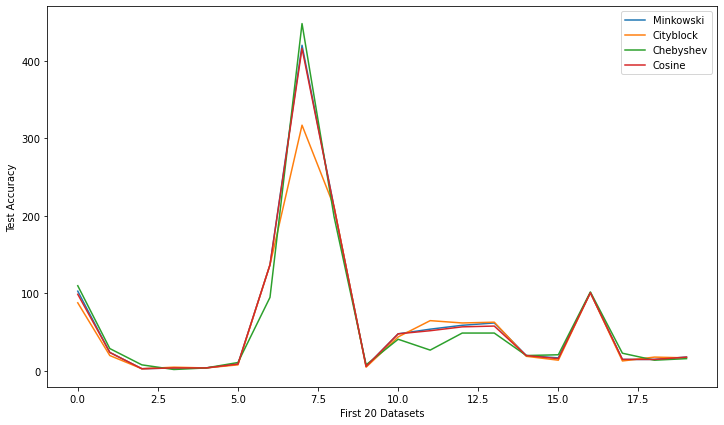

In [182]:
plt.figure(figsize=(12,7))
plt.title('')
plt.plot(accuracy_over_twenty_datas_minkowski, label = 'Minkowski')
plt.plot(accuracy_over_twenty_datas_cityblock, label = 'Cityblock')
plt.plot(accuracy_over_twenty_datas_chebyshev, label = 'Chebyshev')
plt.plot(accuracy_over_twenty_datas_cosine, label = 'Cosine')
plt.xlabel('First 20 Datasets')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

### EX 2 .3 Aggregated Results

In [183]:
aggreg_result =[sum(accuracy_over_twenty_datas_minkowski),sum(accuracy_over_twenty_datas_cityblock),sum(accuracy_over_twenty_datas_chebyshev),sum(accuracy_over_twenty_datas_cosine)]

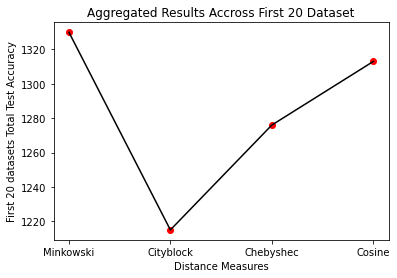

In [225]:
plt.title('Aggregated Results Accross First 20 Dataset')
plt.plot(['Minkowski','Cityblock','Chebyshec','Cosine'],aggreg_result,'ro',['Minkowski','Cityblock','Chebyshec','Cosine'],aggreg_result,'k')
plt.xlabel('Distance Measures')
plt.ylabel('First 20 datasets Total Test Accuracy')
plt.show()

So 'Minkowski' distance has the best performance.

In [230]:
table =pd.DataFrame(aggreg_result ,['Minkowski','Cityblock','Chebyshec','Cosine'],columns=['Test']) 

In [238]:
table

,Test
Minkowski,1330.0
Cityblock,1215.0
Chebyshec,1276.0
Cosine,1313.0
